In [679]:
## Exercício 4

## Utilizando o dataset Fifa19: Imagine que você é diretor de um
## clube e possui um certo orçamento para comprar 11 jogadores que 
## irão compor o time titular. Cada jogador é contratado de acordo 
## com a release clause. O presidente deseja trazer jogadores jovens,
## sendo assim, pede que você não contrate ninguém acima de 29 anos. 
## O presidente também demanda que você não traga nenhuma estrelinha 
## que possa conturbar o elenco, sendo assim, o preço máximo a ser 
## pago por um jogador não pode ultrapassa os 15 milhões de euros. 
## Quais são os 11 jogadores de maior Overall que você consegue 
## trazer para seu clube? Isto, é claro, seguindo as restrições 
## orçamentárias e etárias impostas pelo seu chefe.
## Para fins do exercício, desconsidere aqui as posições táticas
## dos jogadores. Ou seja, traga 11 atacantes se isso for a melhor 
## escolha.

In [693]:
import pandas as pd
import numpy as np
complete_data = pd.read_csv('fifa19.csv')

## pegando apenas o q vamos usar
data = complete_data[['Name','Age','Release Clause','Overall']]

In [694]:
## tirando jogadores acima de 29 anos.
data = data[data['Age']<=29]

In [695]:
# ## Limpando e transformando de string para float
data['Release Clause'] = data['Release Clause'].str.replace('€', '')

data['Release Clause'] = (data['Release Clause'].replace(r'[KM]+$', '', regex=True).astype(float) * \
data['Release Clause'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [698]:
## tirando estrelhinhas que ultrapassam 15 milhões
data = data[data['Release Clause']<15000000]

In [699]:
## ordenando por maiores valores de overall
data = data.sort_values(['Overall'],ascending=False)

In [700]:
## lista dos 11 melhores jogadores de acordo com as restrições

lista_11 = data[:11]

In [701]:
## Exercício 5


## Utilizando o dataset Fifa19: Utilizando a tabela com os jogadores 
## que você selecionou no exercício anterior, crie uma coluna chamada 
## High_Price que recebe 1 se a Release Clause do jogador está acima 
## da mediana dos 11 selecionados, e 0 caso contrário.

In [702]:
## descobrindo a mediana de Release Clause dos 11 jogadores
mediana = lista_11['Release Clause'].median()
mediana

13800000.0

In [703]:
## Condicionando 1 para jogadores com valor maior q a mediana dos 11 selecionados
## e 0 para jogadores com valor menor q a mediana 
lista_11['High Price'] = np.where(lista_11['Release Clause']>mediana, '1', '0')

/home/luiza.vieira/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [704]:
lista_11

,Name,Age,Release Clause,Overall,High Price
578,M. Campaña,29,14800000.0,79,1
817,V. Chiricheş,28,14500000.0,78,1
785,C. Izquierdoz,29,11200000.0,78,0
1128,Cote,28,14700000.0,77,1
1057,Rafael Carioca,29,13600000.0,77,0
1058,A. McCarthy,28,13800000.0,77,0
1075,Jordi Masip,29,13200000.0,77,0
1076,B. Espinosa,28,14700000.0,77,1
1082,W. Reid,29,13300000.0,77,0
1108,M. Lang,27,14200000.0,77,1


In [705]:
## Exercício 6 

## Utilizando o dataset Fifa19: Apresente os histogramas com a 
## distribuição do peso, idade e salário dos jogadores que você 
## escolheu no exercício 4.

In [707]:
## removendo algumas colunas repetidas
graph_list = pd.merge(lista_11, complete_data, on=['Name'])
graph_list = graph_list.drop(columns=['Age_x','Release Clause_y'])
graph_list.head(3)

,Name,Release Clause_x,Overall_x,High Price,Unnamed: 0,ID,Age_y,Photo,Nationality,Flag,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,M. Campaña,14800000.0,79,1,578,225647,29,https://cdn.sofifa.org/players/4/19/225647.png,Uruguay,https://cdn.sofifa.org/flags/60.png,...,23.0,51.0,22.0,16.0,18.0,81.0,75.0,74.0,80.0,82.0
1,V. Chiricheş,14500000.0,78,1,817,205943,28,https://cdn.sofifa.org/players/4/19/205943.png,Romania,https://cdn.sofifa.org/flags/39.png,...,51.0,69.0,83.0,82.0,78.0,7.0,11.0,10.0,14.0,13.0
2,C. Izquierdoz,11200000.0,78,0,785,214766,29,https://cdn.sofifa.org/players/4/19/214766.png,Argentina,https://cdn.sofifa.org/flags/52.png,...,51.0,58.0,78.0,79.0,78.0,8.0,11.0,7.0,8.0,8.0


In [709]:
import seaborn as sns
import matplotlib.pyplot as plt

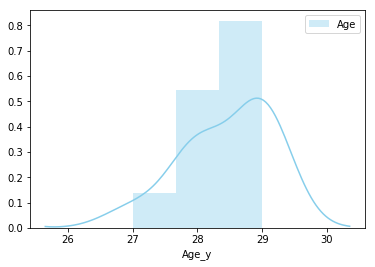

In [710]:
## HISTOGRAMA COM A DISTRIBUIÇÃO DA IDADE
sns.distplot( graph_list["Age_y"] , color="skyblue", label="Age")
plt.legend()

In [711]:
## Limpando o Wieght e transoformando em float
graph_list['Weight'] = graph_list['Weight'].str.replace('lbs', '')
graph_list['Weight'] = graph_list['Weight'].astype('float')


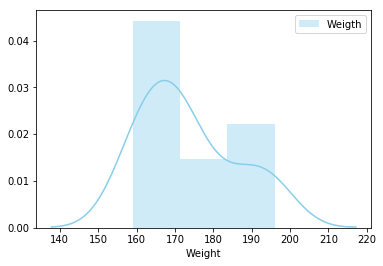

In [712]:
## HISTOGRAMA COM A DISTRIBUIÇÃO DO PESO
sns.distplot( graph_list["Weight"] , color="skyblue", label="Weigth")
plt.legend()

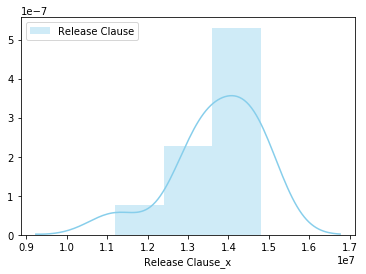

In [713]:
## HISTOGRAMA COM A DISTRIBUIÇÃO DO PESO
sns.distplot( graph_list["Release Clause_x"] , color="skyblue", label="Release Clause")
plt.legend()